In [11]:
!pip install finance-datareader
!pip install git+https://github.com/quantopian/pyfolio




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install TA-Lib

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,1980-12-12
End date,2023-06-23
Total months,510
,Backtest
Annual return,18.668%
Cumulative returns,145348.307%
Annual volatility,44.706%
Sharpe ratio,0.61
Calmar ratio,0.23
Stability,0.88
Max drawdown,-82.217%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,82.22,1991-04-02,1997-12-23,1999-09-03,2199
1,81.80,2000-03-22,2003-04-17,2005-01-26,1266
2,76.89,1983-06-06,1985-08-15,1987-02-17,967
3,69.44,1980-12-29,1982-07-08,1983-01-20,539
4,60.87,2007-12-28,2009-01-20,2009-10-21,474


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


Stress Events,mean,min,max
Dotcom,0.06%,-9.10%,10.73%
Lehman,-0.78%,-17.92%,7.98%
9/11,0.18%,-7.87%,6.01%
US downgrade/European Debt Crisis,-0.01%,-5.46%,5.89%
Fukushima,-0.22%,-4.46%,2.61%
US Housing,-0.20%,-4.09%,3.18%
EZB IR Event,-0.25%,-2.60%,2.43%
Aug07,0.26%,-5.69%,5.72%
Mar08,0.89%,-3.32%,6.40%
Sept08,-1.84%,-17.92%,7.98%


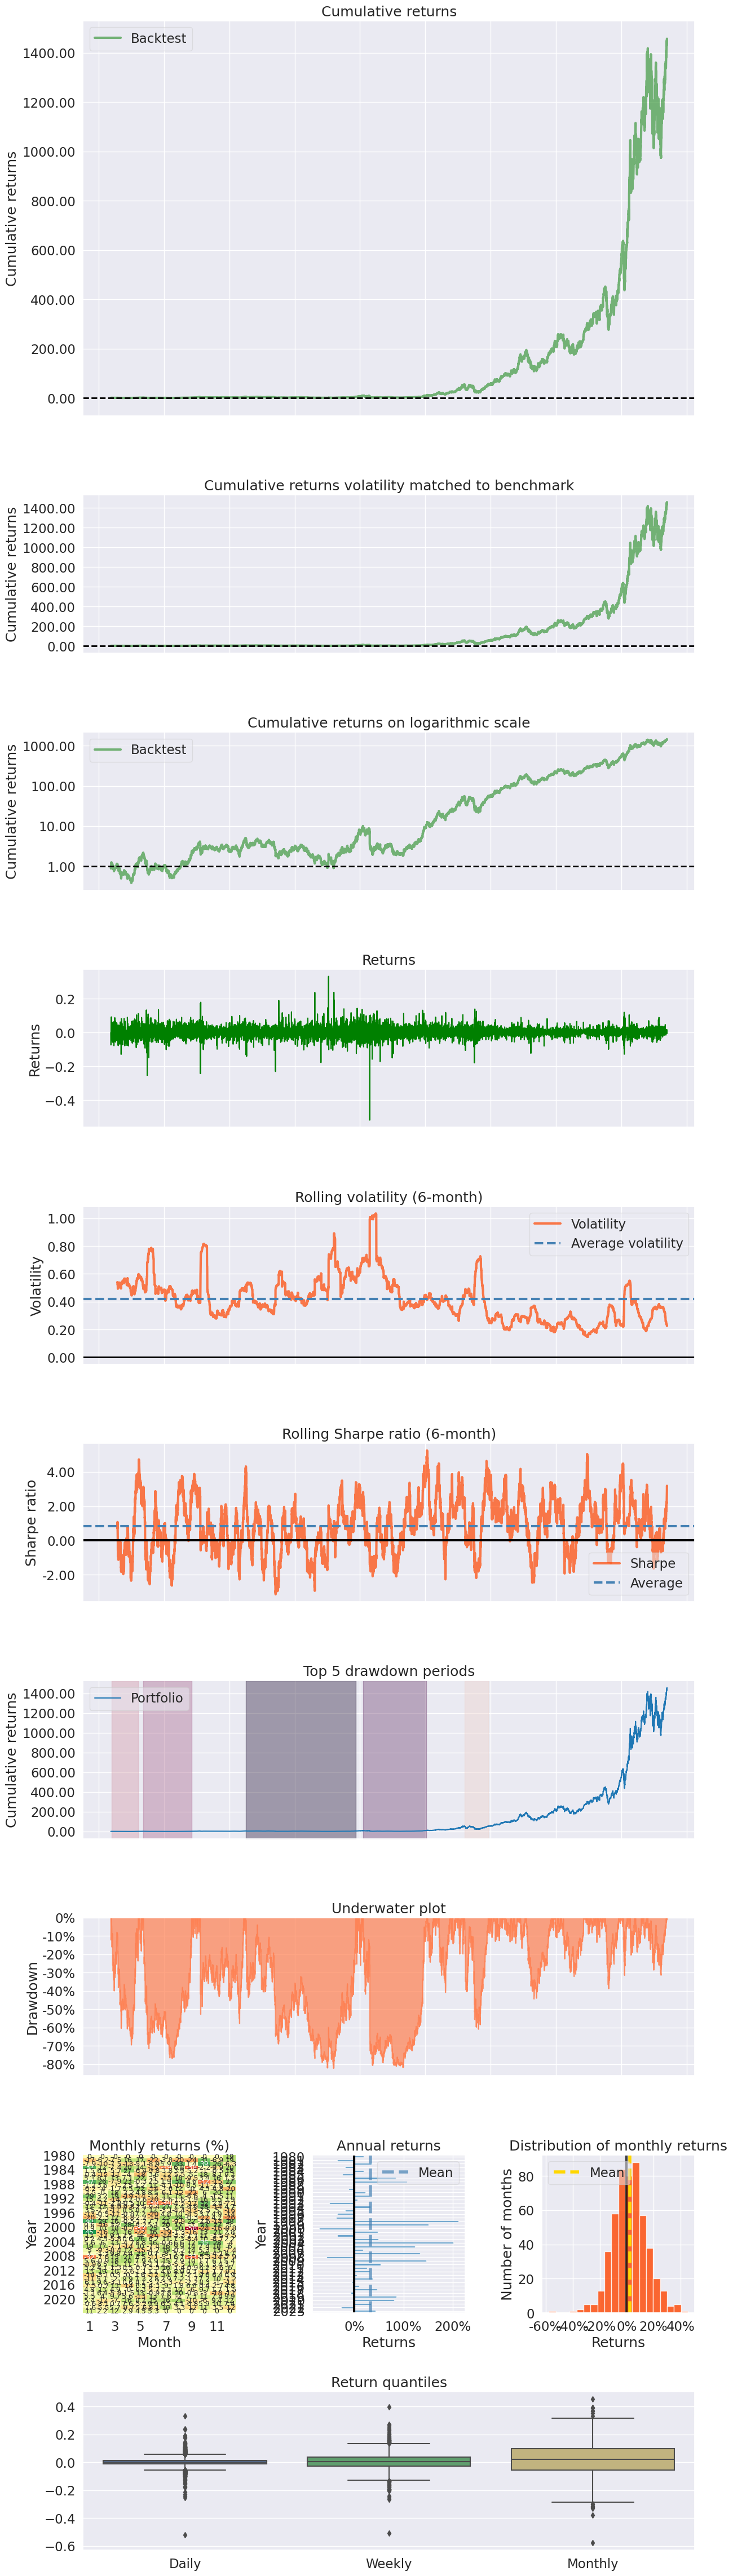

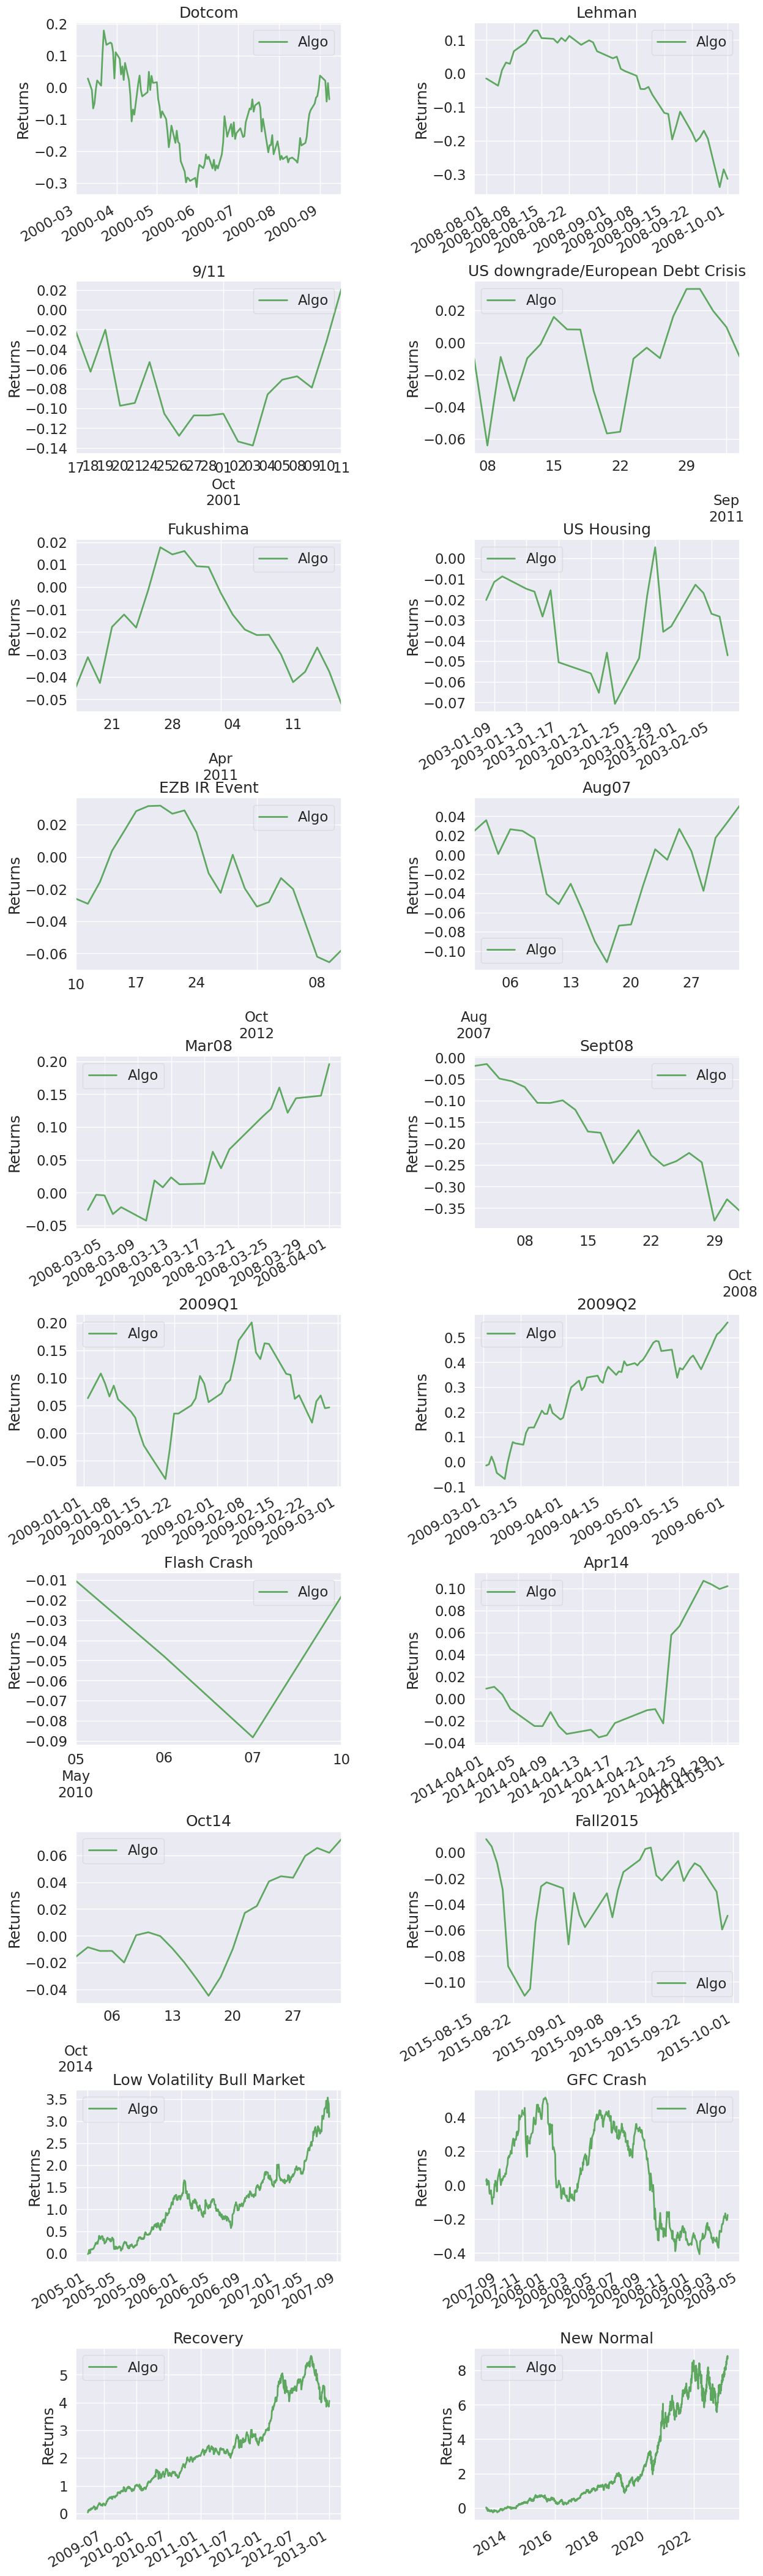

In [67]:
## FEtching the data
import FinanceDataReader as fdr
import datetime
import talib
import pandas as pd
import matplotlib.pyplot as plt

start_date = datetime.datetime.now() - datetime.timedelta(days=3*365)
end_date = datetime.datetime.now()
symbol = 'HDFCBANK.NS'



df = fdr.DataReader(symbol, start_date, end_date)

pf.create_full_tear_sheet(return_series)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2020-06-25 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       747 non-null    float64
 1   High       747 non-null    float64
 2   Low        747 non-null    float64
 3   Close      747 non-null    float64
 4   Adj Close  747 non-null    float64
 5   Volume     747 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.9 KB


In [45]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,1021.900024,1049.000000,1007.000000,1028.750000,1001.063782,35323395
2020-06-26,1041.000000,1063.000000,1028.000000,1056.449951,1028.018311,19984569
2020-06-29,1037.000000,1082.599976,1037.000000,1076.050049,1047.090820,23002978
2020-06-30,1074.000000,1078.550049,1056.300049,1065.849976,1037.165283,17873065
2020-07-01,1065.849976,1096.000000,1061.300049,1084.599976,1055.410645,17423359


# Relative Strength Index (RSI)
The RSI strategy is a simple trading strategy based on the Relative Strength Index (RSI) indicator

Buy Signal: When the RSI crosses above the 60 threshold, it indicates an overbought condition, suggesting a potential trend reversal or pullback.

Sell Signal: When the RSI crosses below the 40 threshold, it indicates an oversold condition, suggesting a potential trend reversal or bounce back

In [46]:
def rsi_strategy(data):
    # Calculate RSI
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

    # Define buy and sell signals based on RSI thresholds
    data['Buy_Signal'] = np.where(data['RSI'] < 40, 1, 0)
    data['Sell_Signal'] = np.where(data['RSI'] > 60, -1, 0)

    # Calculate positions
    data['Position'] = data['Buy_Signal'] + data['Sell_Signal']

    return data

In [47]:
stock_data = rsi_strategy(df)

In [48]:
returns = stock_data['Close'].pct_change()
positions = stock_data['Position'].shift()
portfolio = pd.DataFrame(index=stock_data.index)
portfolio['returns'] = returns
portfolio['positions'] = positions
portfolio = portfolio.dropna()

# Three Years Backtest Using Pyfolio on HDCBANK



/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2020-06-26
End date,2023-06-23
Total months,35
,Backtest
Annual return,17.146%
Cumulative returns,59.757%
Annual volatility,24.4%
Sharpe ratio,0.77
Calmar ratio,0.71
Stability,0.43
Max drawdown,-24.125%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.13,2021-10-19,2022-06-16,2023-01-24,331
1,15.96,2021-02-16,2021-04-12,2021-10-11,170
2,11.99,2020-07-21,2020-08-03,2020-10-06,56
3,9.06,2023-01-24,2023-03-15,2023-05-04,73
4,8.80,2021-01-19,2021-01-28,2021-02-02,11


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


Stress Events,mean,min,max
New Normal,0.07%,-5.91%,10.01%


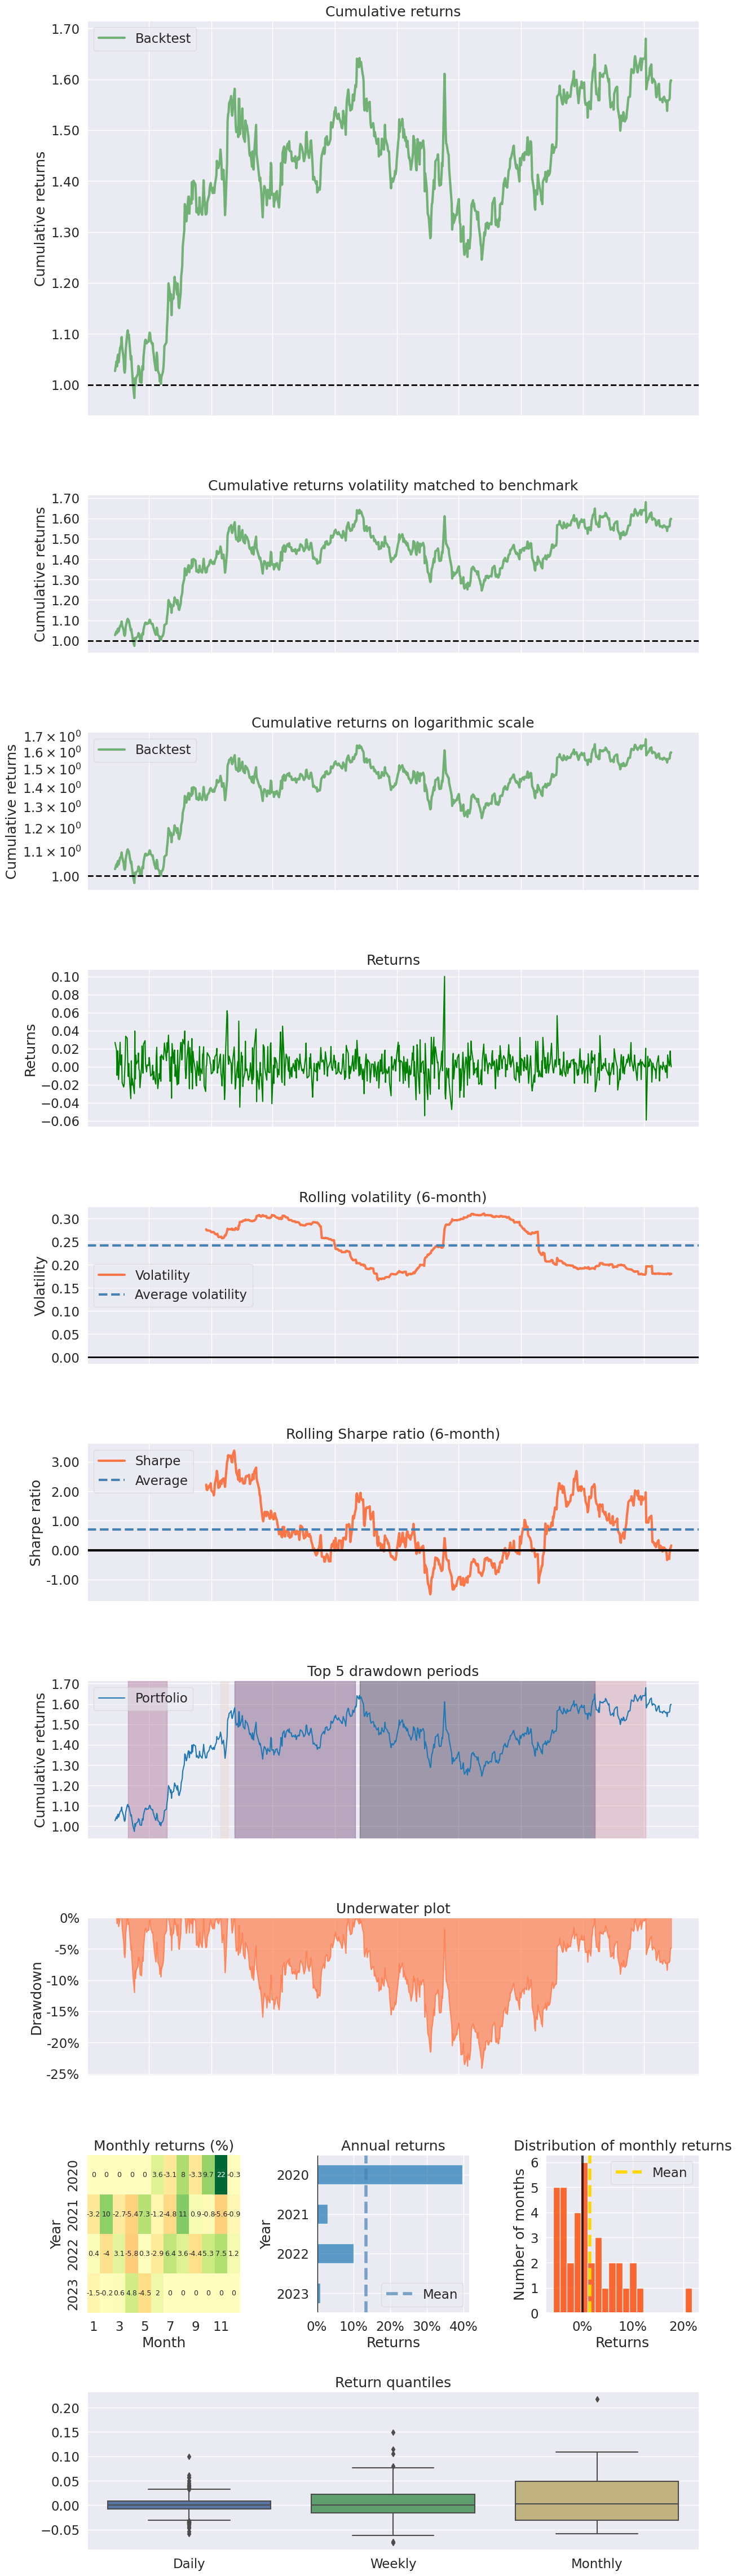

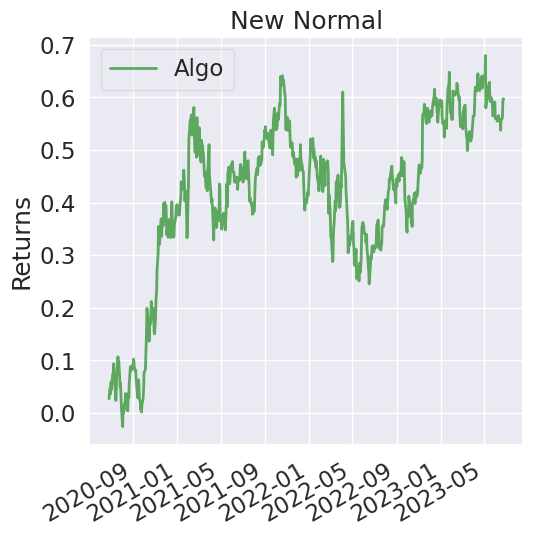

In [66]:
returns = portfolio['returns']
pf.create_full_tear_sheet(returns)




# Returns


<Axes: title={'center': 'Annual returns'}, xlabel='Returns', ylabel='Year'>

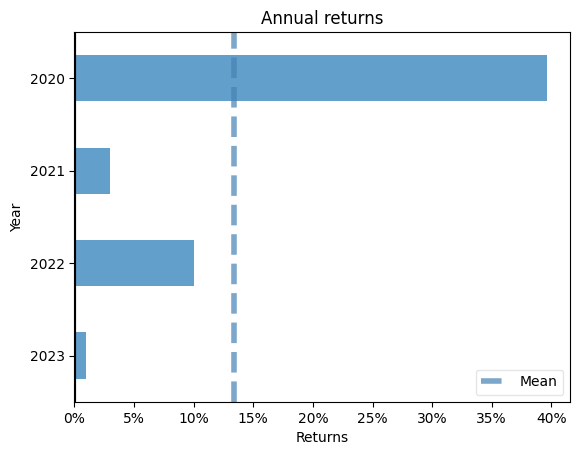

In [75]:
pf.plotting.plot_annual_returns(returns, ax=None)

In [52]:
pf.timeseries.aggregate_returns(returns,'weekly')

<ipython-input-52-6df5142fbb93>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  pf.timeseries.aggregate_returns(returns,'weekly')


Date  Date
2020  26      0.026926
      27      0.016565
      28      0.029005
      29     -0.006018
      30      0.018799
                ...   
2023  21     -0.018884
      22     -0.005756
      23      0.002552
      24     -0.004874
      25      0.025425
Name: returns, Length: 158, dtype: float64

In [73]:
pf.timeseries.aggregate_returns(returns,'monthly')

<ipython-input-73-300a797c7945>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  pf.timeseries.aggregate_returns(returns,'monthly')


Date  Date
2020  6       0.036063
      7      -0.031008
      8       0.080412
      9      -0.033383
      10      0.097302
      11      0.217397
      12     -0.003158
2021  1      -0.031888
      2       0.103488
      3      -0.026558
      4      -0.054464
      5       0.073320
      6      -0.011842
      7      -0.047700
      8       0.108626
      9       0.008568
      10     -0.007586
      11     -0.056417
      12     -0.009474
2022  1       0.004258
      2      -0.040015
      3       0.030920
      4      -0.058319
      5       0.003142
      6      -0.029483
      7       0.063947
      8       0.036187
      9      -0.043570
      10      0.053013
      11      0.074664
      12      0.012248
2023  1      -0.015140
      2      -0.002432
      3       0.006220
      4       0.048492
      5      -0.045479
      6       0.020269
Name: returns, dtype: float64

<Axes: title={'center': 'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

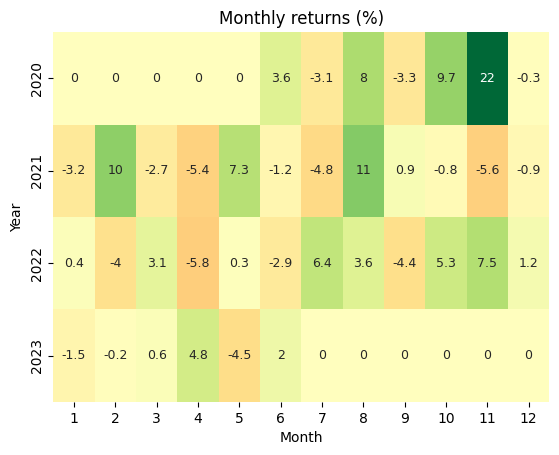

In [60]:
pf.plotting.plot_monthly_returns_heatmap(returns, ax=None)


In [77]:
cummulative_returns=pf.timeseries.cum_returns(returns)
cummulative_returns

<ipython-input-77-1d0baab13f91>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  cummulative_returns=pf.timeseries.cum_returns(returns)


Date
2020-06-26    0.026926
2020-06-29    0.045978
2020-06-30    0.036063
2020-07-01    0.054289
2020-07-02    0.058955
                ...   
2023-06-19    0.559320
2023-06-20    0.562576
2023-06-21    0.589891
2023-06-22    0.597667
2023-06-23    0.597570
Length: 746, dtype: float64

In [56]:

pf.timeseries.downside_risk(returns, required_return=0, period='daily')

<ipython-input-56-518469fe90fa>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  pf.timeseries.downside_risk(returns, required_return=0, period='daily')


0.1612619693803777

# Drawdown Periods


<Axes: title={'center': 'Top 10 drawdown periods'}, ylabel='Cumulative returns'>

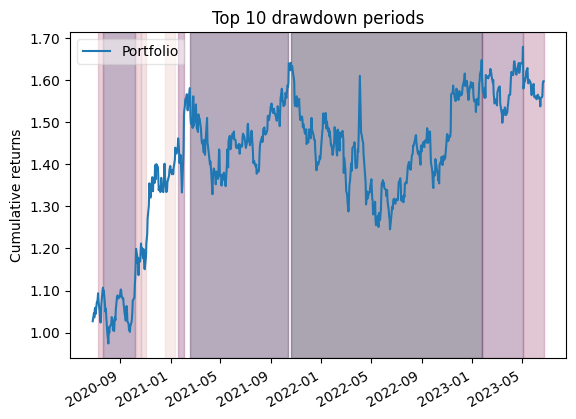

In [71]:
pf.plotting.plot_drawdown_periods(returns, top=10, ax=None)

In [68]:
pf.plotting.show_worst_drawdown_periods(returns, top=5)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.13,2021-10-19,2022-06-16,2023-01-24,331
1,15.96,2021-02-16,2021-04-12,2021-10-11,170
2,11.99,2020-07-21,2020-08-03,2020-10-06,56
3,9.06,2023-01-24,2023-03-15,2023-05-04,73
4,8.80,2021-01-19,2021-01-28,2021-02-02,11
